# Redes neurais generativas
- treinamento do tensorflow: https://www.tensorflow.org/beta/tutorials/generative/dcgan

## Importação das bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
tf.__version__

'2.12.0'

## Carregamento e pre-processamento da base de dados

In [ ]:
(X_treinamento, Y_treinamento), (_,_) = tf.keras.datasets.mnist.load_data()  #essa função tambem carrega as imagens de teste, porém não vamos precisar

In [ ]:
X_treinamento.shape

(60000, 28, 28)

In [ ]:
Y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

4


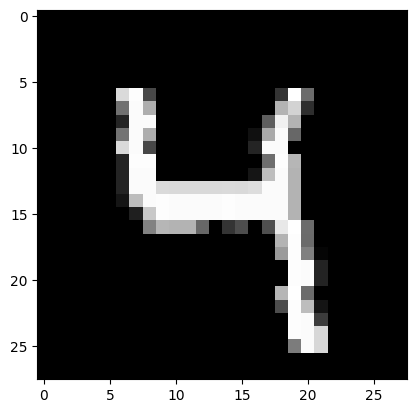

In [ ]:
#vendo imagens aleatóias da base de dados
i = np.random.randint(0, 60000)
print(Y_treinamento[i])
plt.imshow(X_treinamento[i], cmap='gray')

In [ ]:
X_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 28,28,1).astype('float32')
X_treinamento.shape

(60000, 28, 28, 1)

In [ ]:
#verificando a escala dos pixeis
X_treinamento[0].min(), X_treinamento[0].max()

(0.0, 255.0)

In [ ]:
#quando trabalhamos com GANs é indicado que os valores estejam entre -1 e 1 pois os resultados podem ser melhores 127.5 é a metade de 255
X_treinamento = (X_treinamento - 127.5) / 127.5
X_treinamento[0].min(), X_treinamento[0].max()

(-1.0, 1.0)

In [ ]:
buffer_size = 60000 #qtd de imagens
batch_size = 256

In [ ]:
#convertendo o tipo do treinamento para o tipo do tensorflow
X_treinamento = tf.data.Dataset.from_tensor_slices(X_treinamento).shuffle(buffer_size).batch(batch_size)

In [ ]:
type(X_treinamento)

tensorflow.python.data.ops.batch_op._BatchDataset

## Construção do gerador
- Batch normalization: https://keras.io/api/layers/normalization_layers/batch_normalization/
- Leaky Relu: https://keras.io/api/layers/activation_layers/leaky_relu/
- Funções de ativação: https://medium.com/@himanshuxd/activation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e
- Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

In [ ]:
#recebe 100 numeros aleatórios e cria uma imagem com 12544 pixeis
def cria_gerador():
  rede = tf.keras.Sequential()

  rede.add(layers.Dense((7*7*256), use_bias=False, input_shape=(100,)))
  rede.add(layers.BatchNormalization())
  rede.add(layers.LeakyRelU())

  #7x7x128
  rede.add(layers.Conv2DTranspose(128, (5,5), padding='same', use_bias=False))
  rede.add(layer.BatchNormalization())
  rede.add(layers.LeakyRelU())

  #14x14x64
  rede.add(layers.Conv2DTranspose(64, (5,5), padding='same', use_bias=False, strides(2,2)))
  rede.add(layer.BatchNormalization())
  rede.add(layers.LeakyRelU())

  #28x28x1
  rede.add(layers.Conv2DTranspose(1, (5,5), padding='same', use_bias=False, strides(2,2), activation='tanh'))

parametros:<br>
- `use_bias`: como o objetivo dessa rede neural é receber numeros aleatórios para gerar imagens, não vamos precisar do bias para ajeitar os numeros
- `BatchNormalization`: camada para normalizar os numeros da camada densa
- `Leaky_RelU`: na função relu, ele não permite valores menores do que 0, se receber valor negativo ela transforma em 0, já a leaky relu ela transforma valores negativos em 0,001
- `Conv2DTranspose`: aumenta a dimensionalidade da imagem, lembrando que o padding valid perde uma parte da imagem e o same adiciona uma camada de 0s a matriz para aproveitar todas as colunas
- `strides`: o quanto a matriz de filtro anda em cada pixel para passar o kernel, na camada transposta, quanto maior esse valor, maior a dimensionalidade. Na normal estaria diminuindo a dimensionalidade
- `activation: 'tanh'`: ativação que retorna valores negativos